In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
match=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

In [4]:
print(match.shape)
print(delivery.shape)

(636, 18)
(150460, 21)


In [5]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [7]:
match.drop('umpire3',axis=1,inplace=True)

In [8]:
pd.isnull(match).sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

In [9]:
match.fillna('not specified',inplace=True)

In [10]:
pd.isnull(match).sum().sum()

np.int64(0)

In [11]:
match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,636.000000,636.000000,636.000000,636.000000,636.000000
mean,318.500000,2012.490566,0.025157,13.682390,3.372642
std,183.741666,2.773026,0.156726,23.908877,3.420338
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,159.750000,2010.000000,0.000000,0.000000,0.000000
50%,318.500000,2012.000000,0.000000,0.000000,4.000000
75%,477.250000,2015.000000,0.000000,20.000000,7.000000
max,636.000000,2017.000000,1.000000,146.000000,10.000000


Get Number of matches conducted in a particular city.

In [12]:
def get_city_match_count(city):
    mask=match['city']==city
    return match[mask].shape[0]

get_city_match_count('Hyderabad')

49

Toss Decisions

<Axes: ylabel='count'>

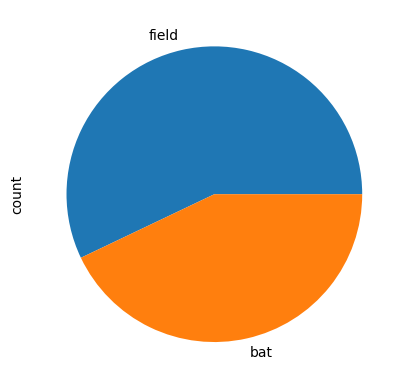

In [13]:
match['toss_decision'].value_counts().plot(kind='pie')

Matches Played vs Matches won by each team.

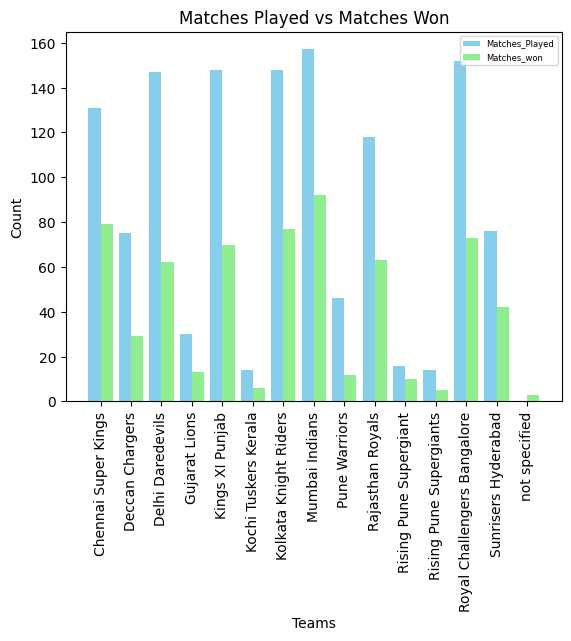

In [14]:
Matches_Played = match['team1'].value_counts() + match['team2'].value_counts()
Matches_won = match['winner'].value_counts(ascending=True)


combined = pd.DataFrame({
    'Matches_Played': Matches_Played,
    'Matches_won': Matches_won
})

bar_width = 0.4

indices = np.arange(len(combined))


plt.bar(indices - bar_width/2, combined['Matches_Played'], width=bar_width, label='Matches_Played', color='skyblue')
plt.bar(indices + bar_width/2, combined['Matches_won'], width=bar_width, label='Matches_won', color='lightgreen')


plt.title('Matches Played vs Matches Won')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.xticks(indices, combined.index,rotation=90)  


plt.legend(fontsize=6, loc='upper right')

# Show the plot
plt.show()

Finding the winner of each season.

In [15]:
match.sort_values(['season','date'],ascending=[True,False]).drop_duplicates('season')[['season','winner']].reset_index(drop=True)


,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


Top five batsman in terms of runs scored.

In [16]:
Batsman=delivery.groupby('batsman')
Batsman['batsman_runs'].sum(numeric_only=True).sort_values(ascending=False).head()

batsman
SK Raina     4548
V Kohli      4423
RG Sharma    4207
G Gambhir    4132
DA Warner    4014
Name: batsman_runs, dtype: int64

Top 5 Batsman with most singles/doubles/triples/fours/sixes

In [17]:
def top_5_batsman_with(n):
    mask=delivery['batsman_runs']==n
    return delivery[mask].groupby('batsman').size().sort_values(ascending=False).head()
top_5_batsman_with(6)

batsman
CH Gayle     266
SK Raina     174
RG Sharma    173
DA Warner    160
V Kohli      160
dtype: int64

Against which 'n' teams, player 'X' scored the most.

In [18]:
def most_scored(name,n=3):
    mask= delivery['batsman']==name
    return delivery[mask].groupby('bowling_team')['batsman_runs'].sum(numeric_only=True).sort_values(ascending=False).head(n)

most_scored('V Kohli',5)

bowling_team
Chennai Super Kings    706
Delhi Daredevils       661
Kings XI Punjab        483
Mumbai Indians         447
Sunrisers Hyderabad    439
Name: batsman_runs, dtype: int64

Find the most destructive death over batsman in the history of IPL.

Strike Rate=(Number of runs/number of balls)*100

Batsman should have played atleast 200 balls in over 16-20

In [19]:
death_over=delivery[delivery['over']>15]
all_batsman=death_over.groupby('batsman').size()
mask=all_batsman>200
batsman_list=all_batsman[mask].index.tolist()

mask=death_over['batsman'].isin(batsman_list)
runs=death_over[mask].groupby('batsman')['batsman_runs'].sum()
balls=death_over[mask].groupby('batsman')['batsman_runs'].count()
((runs/balls)*100).sort_values(ascending=False).head()

batsman
AB de Villiers    211.052632
DA Warner         189.473684
DA Miller         186.666667
V Kohli           181.868132
RG Sharma         175.668449
Name: batsman_runs, dtype: float64

List of orange cap holder(most runs in season)

In [20]:
new=delivery.merge(match,left_on='match_id',right_on='id')
new.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values(['season','batsman_runs'],ascending=[True,False]).drop_duplicates('season')[['season','batsman']].reset_index(drop=True)

,season,batsman
0,2008,SE Marsh
1,2009,ML Hayden
2,2010,SR Tendulkar
3,2011,CH Gayle
4,2012,CH Gayle
5,2013,MEK Hussey
6,2014,RV Uthappa
7,2015,DA Warner
8,2016,V Kohli
9,2017,DA Warner


Pivot Table
( Overs versus Sixes scored by each team)

In [22]:
mask=delivery['batsman_runs']==6
six=delivery[mask]
pt=six.pivot_table(index='over',columns='batting_team',values='batsman_runs',aggfunc='count')
pt.fillna(0)


batting_team,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
over,,,,,,,,,,,,,,
1,5.0,3.0,14.0,4.0,10.0,2.0,10.0,9.0,5.0,12.0,1.0,0.0,20.0,3.0
2,17.0,21.0,19.0,6.0,19.0,4.0,13.0,17.0,6.0,7.0,0.0,2.0,28.0,12.0
3,37.0,11.0,30.0,14.0,27.0,3.0,28.0,22.0,6.0,13.0,2.0,1.0,40.0,16.0
4,34.0,17.0,41.0,9.0,36.0,3.0,35.0,28.0,7.0,21.0,5.0,1.0,43.0,8.0
5,41.0,27.0,29.0,11.0,30.0,3.0,25.0,43.0,7.0,23.0,8.0,5.0,40.0,17.0
6,43.0,22.0,27.0,12.0,39.0,3.0,34.0,50.0,3.0,24.0,6.0,5.0,29.0,10.0
7,22.0,11.0,20.0,10.0,19.0,2.0,26.0,18.0,5.0,15.0,1.0,4.0,18.0,13.0
8,25.0,13.0,26.0,6.0,35.0,2.0,25.0,23.0,10.0,24.0,0.0,3.0,34.0,19.0
9,23.0,17.0,32.0,11.0,36.0,1.0,27.0,35.0,9.0,20.0,3.0,1.0,47.0,15.0
